In [4]:
emin = 0.5
emax = 3
arm_len = 0.5


t2 = (0.3, 0.55)
t3 = (0.3, 0.75)
t4 = (0.3, 1.15)


Target point: (0.3, 2.0)
Found 2 solution(s):


ValueError: 'blue--' is not a valid format string (unrecognized character 'l')

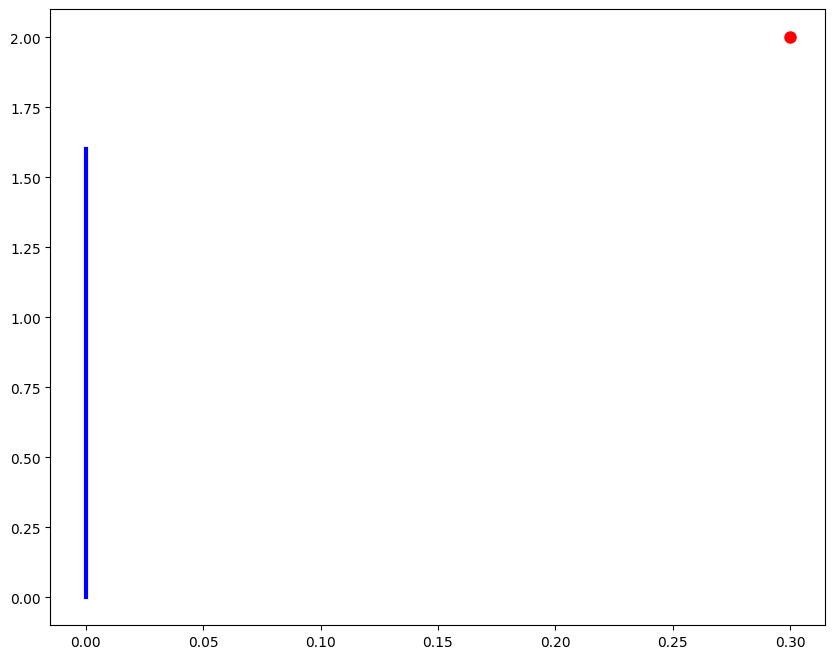

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def inverse_kinematics(target_x, target_y, arm_length=0.5, min_height=1.0, max_height=3.0):
    """
    Solve inverse kinematics for a robot with an elevator and a single arm.
    
    Parameters:
    - target_x, target_y: Target coordinates for the arm tip
    - arm_length: Length of the arm (default: 0.5m)
    - min_height, max_height: Elevator height limits (default: 1.0-3.0m)
    
    Returns:
    - List of valid solutions (h, θ) pairs
    """
    # Check if target is reachable (within arm's reach)
    if abs(target_x) > arm_length:
        print(f"Target X={target_x} is beyond the arm's reach (max X = ±{arm_length})")
        return []
    
    # Calculate θ using the relationship X = L*cos(θ)
    # This gives us two possible angles with the same cosine value
    cos_theta = target_x / arm_length
    theta1 = np.arccos(cos_theta)
    theta2 = -theta1  # The second possible angle
    
    # Calculate the corresponding heights using Y = h + L*sin(θ)
    h1 = target_y - arm_length * np.sin(theta1)
    h2 = target_y - arm_length * np.sin(theta2)
    
    solutions = []
    
    # Check if solutions are within elevator height limits
    if min_height <= h1 <= max_height:
        solutions.append((h1, theta1))
    else:
        print(f"Solution 1: h={h1:.2f}m is outside elevator range [{min_height}-{max_height}]m")
    
    if min_height <= h2 <= max_height:
        solutions.append((h2, theta2))
    else:
        print(f"Solution 2: h={h2:.2f}m is outside elevator range [{min_height}-{max_height}]m")
    
    return solutions

def verify_solution(h, theta, target_x, target_y, arm_length=0.5):
    """Verify that a solution reaches the target point."""
    x = arm_length * np.cos(theta)
    y = h + arm_length * np.sin(theta)
    error = np.sqrt((x - target_x)**2 + (y - target_y)**2)
    return x, y, error

def plot_solutions(target_x, target_y, solutions, arm_length=0.5):
    """Plot the robot configurations for each solution."""
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot target point
    ax.plot(target_x, target_y, 'ro', markersize=8, label='Target')
    
    # Define colors for solutions
    colors = ['blue', 'green', 'purple', 'orange']
    
    # Plot each solution
    for i, (h, theta) in enumerate(solutions):
        color = 'blue'
        
        # Plot elevator
        ax.plot([0, 0], [0, h], f'{color}', linewidth=3, label=f'Elevator (h={h:.2f}m)')
        
        # Plot arm
        x_tip = arm_length * np.cos(theta)
        y_tip = h + arm_length * np.sin(theta)
        ax.plot([0, x_tip], [h, y_tip], f'{color}', linewidth=2, label=f'Arm (θ={np.degrees(theta):.1f}°)')
        
        # Draw arc to show angle
        arc = Arc((0, h), 0.3, 0.3, 0, 0, np.degrees(theta), color=color)
        ax.add_patch(arc)
        
        # Verify solution reaches target
        x, y, error = verify_solution(h, theta, target_x, target_y, arm_length)
        print(f"Solution {i+1}: h={h:.2f}m, θ={np.degrees(theta):.2f}° (error={error:.6f}m)")
    
    # Configure plot
    ax.grid(True)
    ax.set_xlim(-1, 1)
    ax.set_ylim(0, 4)
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_title(f'Inverse Kinematics Solutions for Target ({target_x}, {target_y})')
    ax.legend(loc='upper right')
    ax.set_aspect('equal')
    
    # Add workspace outline
    elevator_bottom = 1.0
    elevator_top = 3.0
    
    theta_range = np.linspace(0, 2*np.pi, 100)
    for h in [elevator_bottom, elevator_top]:
        x_ws = arm_length * np.cos(theta_range)
        y_ws = h + arm_length * np.sin(theta_range)
        ax.plot(x_ws, y_ws, 'k--', alpha=0.3)
    
    # Connect top and bottom workspace outlines
    ax.plot([-arm_length, -arm_length], [elevator_bottom - arm_length, elevator_top + arm_length], 'k--', alpha=0.3)
    ax.plot([arm_length, arm_length], [elevator_bottom - arm_length, elevator_top + arm_length], 'k--', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Example 1: Reachable point with multiple solutions
    target_x, target_y = 0.3, 2.0
    print(f"\nTarget point: ({target_x}, {target_y})")
    solutions = inverse_kinematics(target_x, target_y)
    if solutions:
        print(f"Found {len(solutions)} solution(s):")
        plot_solutions(target_x, target_y, solutions)
    
    # Example 2: Point at maximum reach
    target_x, target_y = 0.5, 1.8
    print(f"\nTarget point: ({target_x}, {target_y})")
    solutions = inverse_kinematics(target_x, target_y)
    if solutions:
        print(f"Found {len(solutions)} solution(s):")
        plot_solutions(target_x, target_y, solutions)
    
    # Example 3: Unreachable point
    target_x, target_y = 0.8, 1.5
    print(f"\nTarget point: ({target_x}, {target_y})")
    solutions = inverse_kinematics(target_x, target_y)
    if solutions:
        print(f"Found {len(solutions)} solution(s):")
        plot_solutions(target_x, target_y, solutions)